Tentative de stats descriptives sympa !

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

,Unnamed: 0,Nom,Etat,Code_Etat,id_Etat,id_county,fips,geometry,unemp_rate_year_2013,unemp_rate_year_2014,...,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop
2478,2478,Humphreys,Tennessee,TN,193,29845,47085.0,"POLYGON ((6334 5849, 6299 5823, 6299 5806, 627...",7.9,7.1,...,13.3,3.35,600869,533394,654192,714774,767953,694101,0.275529,0.690293
1463,1463,Perry,Mississippi,MS,153,28811,28111.0,"POLYGON ((6153 4505, 6127 4503, 6096 4500, 609...",9.5,8.2,...,11.0,0.80,231711,214829,252372,276161,251852,247278,0.224595,0.761230
204,204,Inyo,California,CA,27286,27535,6027.0,"MULTIPOLYGON (((406 6166, 16 6258, -44 6273, -...",7.2,6.3,...,26.1,5.10,1368295,1474616,1761079,2377167,1570110,1297132,0.394572,0.531266
1674,1674,Cedar,Nebraska,NE,27309,29026,31027.0,"POLYGON ((4265 7549, 4300 7553, 4327 7535, 433...",2.6,2.1,...,19.4,2.95,91553,68568,79340,88663,74318,74477,0.131193,0.810321
483,483,Lowndes,Georgia,GA,27292,27819,13185.0,"POLYGON ((7362 4668, 7398 4672, 7402 4673, 741...",7.2,6.4,...,25.6,1.25,527885,484580,566946,612985,541655,549532,0.396979,0.578817


In [4]:
gun_violence_db = pd.read_csv('data/gun_violence_db.csv')
gun_violence_db.sample(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
184724,833712,2017-04-30,California,Glen Ellen,Warm Springs Rd,0,0,http://www.gunviolencearchive.org/incident/833712,https://data.sonomasheriff.org/files/press-arr...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://data.sonomasheriff.org/files/press-arr...,4.0,2.0
58274,296640,2015-02-21,Tennessee,Paris,621 Nelson School Road,0,1,http://www.gunviolencearchive.org/incident/296640,http://www.parispi.net/news/local_news/article...,False,...,{0: '52'},{0: 'Adult 18+'},{0: 'Male'},{0: 'Mark Brandon'},NaN,{0: 'Injured'},{0: 'Victim'},http://www.parispi.net/news/local_news/article...,75.0,24.0
202617,909368,2017-08-08,Pennsylvania,Pittsburgh,Sheradan St and Bergman St,0,0,http://www.gunviolencearchive.org/incident/909368,http://www.pittsburghpa.gov/publicsafety/artic...,False,...,NaN,NaN,{0: 'Male'},NaN,NaN,{0: 'Arrested'},{0: 'Subject-Suspect'},http://www.pittsburghpa.gov/publicsafety/artic...,NaN,NaN
195889,880874,2017-07-02,Georgia,Savannah,Montgomery Street and W 61st Street,0,1,http://www.gunviolencearchive.org/incident/880874,http://www.wtvm.com/story/35798546/early-morni...,False,...,NaN,{0: 'Adult 18+'},{0: 'Male'},NaN,NaN,{0: 'Injured'},{0: 'Victim'},http://www.wtvm.com/story/35798546/early-morni...,163.0,2.0
106652,481066,2016-01-06,Pennsylvania,Philadelphia,2600 block of North Stanley Street,1,0,http://www.gunviolencearchive.org/incident/481066,http://6abc.com/news/man-shot-and-killed-in-st...,False,...,{0: '48'},{0: 'Adult 18+'},{0: 'Male'},{0: 'Damon Swain'},NaN,{0: 'Killed'},{0: 'Victim'},http://6abc.com/news/man-shot-and-killed-in-st...,NaN,NaN


Puis fusion des deux bases sur les données géographiques

In [5]:
#Conversion to geopandas
from shapely import wkt

def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None

total_db['geometry'] = total_db['geometry'].apply(wkt_loads)
total_db_geo = gpd.GeoDataFrame(data=total_db, geometry=total_db['geometry'], crs=4329)

In [21]:
incident_geom = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=incident_geom)


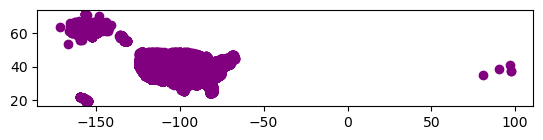

In [37]:
f, ax = plt.subplots()
gun_violence_geo.to_crs(total_db_geo.crs).plot(color='purple', ax=ax, aspect=1)
#total_db_geo.to_crs(gun_violence_geo.crs).plot(ax=ax, aspect=1)
plt.show()

In [31]:
gun_violence_geo.crs = 'EPSG:4329'